# Basic Information

**Competition Info:**

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv

In [428]:
#modules
import pandas as pd
import numpy as np
import datetime as dt
import itertools

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

#encoding
import category_encoders as ce

#transforming
from scipy import stats
from scipy.stats import boxcox, skew
from scipy.special import inv_boxcox

#scaling
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, RobustScaler, MinMaxScaler, Normalizer

#train and test
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#regularization
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

In [429]:
df = pd.read_csv(r'D:\Vscode\Module 1\Data\house_regression_train.csv')

In [430]:
test = pd.read_csv(r'D:\Vscode\Module 1\Data\house_regression_test.csv')
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,Hd

In [431]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.width', None)

In [432]:
#test,train,split
X = df.drop(['Id', 'SalePrice'], axis = 1)
y = df[['SalePrice']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.20)

In [433]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1168, 79)
(1168, 1)
(292, 79)
(292, 1)


# Outliers

In [434]:
#merge X_train and y_train to drop outliers
train_df = pd.concat([X_train, y_train], axis = 1)
train_df.shape

(1168, 80)

In [435]:
def drop_MasVnrOutliers(data):
    condition1 = (data['MasVnrType'].isnull()) & (data['MasVnrArea']>0)
    if condition1.any():
        data = data.drop(data[condition1].index)  
    return data  

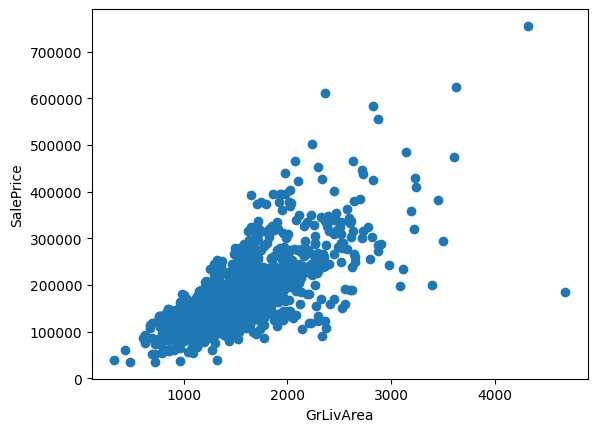

In [436]:
plt.scatter(train_df.GrLivArea, train_df.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice');
#drop the outlier at the bottom right

In [437]:
train_df[(train_df.GrLivArea>4000)&(train_df.SalePrice<200000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [438]:
train_df.drop(523,inplace=True)
train_df.shape

(1167, 80)

In [439]:
train_df[(train_df['MasVnrArea']<20) & ((train_df['MasVnrArea']!=0))]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
465,120,RM,NaN,3072,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2004,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,18.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1375,1375,GasA,Ex,Y,SBrkr,1414,0,0,1414,0,0,2,0,2,1,Gd,6,Typ,1,TA,Attchd,2004.0,Fin,2,398,TA,TA,Y,144,20,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,178740
773,20,RL,70.0,10150,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,5,1958,1958,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,1.0,TA,TA,CBlock,TA,TA,No,Rec,456,Unf,0,456,912,GasA,Ex,Y,FuseA,912,0,0,912,0,0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1958.0,RFn,1,275,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2007,COD,Normal,114500
790,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,11.0,Gd,TA,PConc,Gd,TA,No,GLQ,16,Unf,0,1129,1145,GasA,Ex,Y,SBrkr,1145,0,0,1145,0,0,2,0,2,1,Gd,5,Typ,1,Gd,Attchd,2005.0,Fin,2,397,TA,TA,Y,100,16,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal,160200
982,20,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,1Fam,1Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1266,1266,GasA,Ex,Y,SBrkr,1266,0,0,1266,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,Fin,2,388,TA,TA,Y,100,16,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,159895
1023,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,14.0,Gd,TA,PConc,Gd,Gd,No,GLQ,16,Unf,0,1330,1346,GasA,Ex,Y,SBrkr,1504,0,0,1504,0,0,2,0,2,1,Gd,7,Typ,1,Gd,Attchd,2005.0,Fin,2,437,TA,TA,Y,156,20,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,191000
385,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1232,1256,GasA,Ex,Y,SBrkr,1269,0,0,1269,0,0,2,0,2,1,Gd,6,Typ,1,TA,Attchd,2004.0,Fin,2,430,TA,TA,Y,146,20,0,0,144,0,NaN,NaN,NaN,0,4,2010,WD,Normal,192000
229,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1357,1373,GasA,Ex,Y,SBrkr,1555,0,0,1555,0,0,2,0,2,1,Gd,7,Typ,1,TA,Attchd,2005.0,Fin,2,430,TA,TA,Y,143,20,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,192500
379,60,RL,60.0,8123,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,982,982,GasA,Ex,Y,SBrkr,1007,793,0,1800,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2000.0,Fin,2,463,TA,TA,Y,100,63,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,179000
1230,90,RL,NaN,18890,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,RRAe,Duplex,1.5Fin,5,5,1977,1977,Shed,CompShg,Plywood,Plywood,NaN,1.0,TA,TA,CBlock,Gd,TA,No,GLQ,498,Rec,211,652,1361,GasA,Ex,Y,SBrkr,1361,1259,0,2620,0,0,2,2,4,2,TA,12,Typ,1,TA,BuiltIn,1977.0,RFn,2,600,TA,TA,N,155,24,145,0,0,0,NaN,NaN,Gar2,8300,8,2007,WD,Normal,190000
219,120,RL,43.0,3010,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,16.0,Gd,TA,PConc,Gd,TA,Av,GLQ,16,Unf,0,1232,1248,

In [440]:
train_df = drop_MasVnrOutliers(train_df)
train_df.shape

(1163, 80)

In [441]:
X_train = train_df.drop('SalePrice', axis=1)
y_train = train_df['SalePrice']

In [442]:
X_train.isnull().sum().tail(40)

HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       549
GarageType         58
GarageYrBlt        58
GarageFinish       58
GarageCars          0
GarageArea          0
GarageQual         58
GarageCond         58
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1159
Fence             949
MiscFeature      1115
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
dtype: int64

# Data Cleaning Functions

In [443]:
#use function on the whole dataframe
def heatmap(data):
    numerical = data.select_dtypes(exclude = ['object'])
    plt.figure(figsize = (12,10))
    sns.heatmap(numerical.corr());

def categorical_df(data):
    objects = data.select_dtypes(include = 'object')
    return objects

def drop_columns(data, dropped_columns):
    return data.drop(columns = dropped_columns, inplace = True)

In [444]:
#imputing nulls MasVnrType and Area
def impute_MasVnr(data):
    condition1 = (data['MasVnrType'].isnull()) & (data['MasVnrArea']!=0)
    condition2 = (data['MasVnrType'].isnull()) & (data['MasVnrArea']<2)
    condition3 = (data['MasVnrType'].isnull()) & (data['MasVnrArea'].isnull())
    condition4 = (data['MasVnrType'].notnull() & data['MasVnrArea'].isnull())
    if condition1.any():
        mode_MasVnrType = X_train['MasVnrType'].mode().iloc[0]
        data.loc[condition1, 'MasVnrType'] = mode_MasVnrType
    if condition2.any():
        data.loc[condition2, 'MasVnrType'] = 'No'
    if condition3.any():
        data.loc[condition3, 'MasVnrType'] = 'No'
        data.loc[condition3, 'MasVnrArea'] = 0
    if condition4.any():
        median_MasVnrArea = X_train.groupby('MasVnrType')['MasVnrArea'].median()
        data.loc[condition4, 'MasVnrArea'] = data.loc[condition4, 'MasVnrType'].map(median_MasVnrArea)
    print('MasVnrType Nulls: ',data['MasVnrType'].isnull().sum() , 'MasVnrArea Nulls: ', data['MasVnrArea'].isnull().sum())
    return data

#imputing nulls LotFrontage
def impute_LotFrontage(data):
    median_LotFrontage = X_train.groupby('Neighborhood')['LotFrontage'].median()
    data.loc[data['LotFrontage'].isnull(), 'LotFrontage'] = data.loc[data['LotFrontage'].isnull(), 'Neighborhood'].map(median_LotFrontage)
    return data

#imputing nulls Functional
def impute_Functional(data):
    data['Functional'] = data['Functional'].fillna('Typ')

#imputing categorical nulls with mode, numerical nulls with median
def impute_nulls(data, column):
    if data[column].dtype == 'O' and data[column].isnull().sum() != 0:
        data[column] = data[column].fillna(X_train[column].mode()[0])
    else:
        data[column] = data[column].fillna(X_train[column].median())
    return data

#categorical imputing nulls as None (garage and basement, PoolQC)
def imputenulls_none(data, column):
    data[column] = data[column].fillna('No')
    return data

#numerical inputing nulls 0 (garageyrblt)
def imputenulls_zero(data, column):
    data[column] = data[column].fillna(0)
    return data

#feature engineering
def feature_engineering(data):
    data['AgeHouse'] = data['YrSold'] - data['YearBuilt']
    data['TotalBsmtBath'] = data['BsmtFullBath'] + (data['BsmtHalfBath']*0.5)
    data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']
    data['TotalBath'] = data['BsmtFullBath'] + (data['BsmtHalfBath']*0.5) + data['FullBath'] + (data['HalfBath']*0.5)
    data['HasBasement'] = data['TotalBsmtSF'].apply(lambda x: 1 if x else 0)
    data['HasBath'] = data['TotalBath'].apply(lambda x: 1 if x else 0)
    data['HasPool'] = data['PoolArea'].apply(lambda x: 1 if x else 0)
    data['HasFireplace'] = data['Fireplaces'].apply(lambda x: 1 if x else 0)
    data['HasGarage'] = data['GarageArea'].apply(lambda x: 1 if x else 0)
    data['HasFence'] = data['Fence'].apply(lambda x: 1 if x else 0)
    
    return data

def change_dtype(data):
  data['MSSubClass'] = data['MSSubClass'].astype(str)
  data['OverallCond'] = data['OverallCond'].astype(str)
  data['LotFrontage'] = data['LotFrontage'].astype(int)
  data['YearBuilt'] = (pd.to_datetime(data['YearBuilt'], format = '%Y')).dt.strftime('%Y')
  data['YearRemodAdd'] = (pd.to_datetime(data['YearRemodAdd'], format = '%Y')).dt.strftime('%Y')
  data['MasVnrArea'] = data['MasVnrArea'].astype(int)
  data['GarageYrBlt'] = (data['GarageYrBlt'].astype(str)).map(lambda x: x.strip('.0'))
  data['MoSold'] = (pd.to_datetime(data['MoSold'], format = '%m')).dt.strftime('%m')
  data['YrSold'] = (pd.to_datetime(data['YrSold'], format = '%Y')).dt.strftime('%Y')
  return data

#log1p transformation (X)
def transformation_function(data):
    numerical_columns = data.select_dtypes(exclude = 'object')
    #print(numerical_columns)
    transformed_columns = np.log1p(numerical_columns)
    data = data.drop(numerical_columns, axis = 1)
    data = pd.concat([data,transformed_columns], axis = 1)
    return data

#log1p transformation (y)
def transformation_y(data):
    transformed_y = np.log1p(data)
    data = pd.DataFrame(transformed_y)
    return data

# encoding (only for X)
def encoding_function(data):
    one = ce.OneHotEncoder(use_cat_names=True)
    e_columns = data.select_dtypes(include = 'object')
    one.fit(e_columns)
    encoded = one.transform(e_columns)
    data = pd.concat([data,one.transform(e_columns)], axis = 1)
    data.drop(e_columns, axis = 1, inplace = True)
    return data, one

def categorical_df(data):
    objects = data.select_dtypes(include = 'object')
    return objects

In [445]:
#preparing submission data
submission = test[['Id']]
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


# Data Cleaning

In [446]:
drop_columns(X_train, ['Utilities'])
drop_columns(X_test, ['Utilities'])
drop_columns(test, ['Utilities','Id'])

In [447]:
#impute for BsmtFinType2 one extra value
print(X_train.loc[332,['BsmtFinType2', 'BsmtFinSF2']])
print(X_train['BsmtFinType2'].value_counts())
print()
print(X_train.groupby('BsmtFinType2')['BsmtFinSF2'].mean())
X_train.loc[332,'BsmtFinType2'] = 'ALQ'
print(X_train.loc[332,'BsmtFinType2'])

BsmtFinType2    NaN
BsmtFinSF2      479
Name: 332, dtype: object
BsmtFinType2
Unf    999
LwQ     42
Rec     38
BLQ     30
ALQ     14
GLQ     11
Name: count, dtype: int64

BsmtFinType2
ALQ    564.428571
BLQ    334.633333
GLQ    624.909091
LwQ    310.928571
Rec    385.894737
Unf      0.000000
Name: BsmtFinSF2, dtype: float64
ALQ


In [448]:
imputenulls_none(X_train, ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType', 'GarageFinish','GarageQual','GarageCond', 'PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature'])
imputenulls_zero(X_train, 'GarageYrBlt')
imputenulls_none(X_test, ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType', 'GarageFinish','GarageQual','GarageCond', 'PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature'])
imputenulls_zero(X_test, 'GarageYrBlt')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,20,RL,NaN,32668,Pave,No,IR1,Lvl,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,No,No,No,0,3,2007,WD,Alloca
491,50,RL,79.0,9490,Pave,No,Reg,Lvl,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,No,MnPrv,No,0,8,2006,WD,Normal
459,50,RL,NaN,7015,Pave,No,IR1,Bnk,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,No,No,No,0,7,2009,WD,Normal
279,60,RL,83.0,10005,Pave,No,Reg,Lvl,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,5,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392,Unf,0,768,1160,GasA,Ex,Y,SBrkr,1156,866,0,2022,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1977.0,Fin,2,505,TA,TA,Y,288,117,0,0,0,0,No,No,No,0,3,2008,WD,Normal
655,160,RM,21.0,1680,Pave,No,Reg,Lvl,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,525,525,GasA,TA,Y,SBrkr,525,567,0,1092,0,0,1,1,3,1,TA,6,Typ,0,No,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,No,No,No,0,3,2010,WD,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,120,RL,32.0,10846,Pave,No,IR1,Lvl,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1619,Unf,0,100,1719,GasA,Ex,Y,SBrkr,1719,0,0,1719,2,0,1,1,1,1,Gd,6,Typ,2,Gd,Attchd,1993.0,Fin,2,473,TA,TA,Y,122,30,0,0,0,0,No,No,No,0,5,2008,Con,Normal
440,20,RL,105.0,15431,Pave,No,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,No,No,No,0,4,2009,WD,Normal
1387,50,RM,60.0,8520,Pave,Grvl,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,6,7,1916,1950,Gable,CompShg,Stucco,Stucco,NaN,0.0,TA,Gd,BrkTil,TA,TA,No,Rec,168,LwQ,546,0,714,GasW,TA,N,SBrkr,1664,862,0,2526,0,0,2,0,5,1,Gd,10,Typ,1,Gd,Detchd,1916.0,Unf,1,216,TA,TA,Y,88,15,0,0,0,0,No,GdWo,No,0,8,2007,CWD,Family
1323,30,RL,50.0,5330,Pave,No,Reg,HLS,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,4,7,1940,1950,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,TA,No,LwQ,280,Unf,0,140,420,GasA,Gd,Y,SBrkr,708,0,0,708,0,0,1,0,2,1,Fa,5,Typ,0,No,No,0.0,No,0,0,No,No,Y,164,0,0,0,0,0,No,No,No,0,12,2009,WD,Normal


In [449]:
imputenulls_none(test, ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType', 'GarageFinish','GarageQual','GarageCond', 'PoolQC', 'Alley', 'FireplaceQu', 'Fence', 'MiscFeature'])
imputenulls_zero(test, ['GarageYrBlt','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath'])
test.shape

(1459, 78)

In [450]:
#imputing nulls for LotFrontage
print(X_train.groupby('Neighborhood')['LotFrontage'].median())
impute_LotFrontage(X_train)
impute_LotFrontage(X_test)

Neighborhood
Blmngtn    43.0
Blueste    24.0
BrDale     21.0
BrkSide    52.0
ClearCr    80.0
CollgCr    70.0
Crawfor    72.0
Edwards    62.0
Gilbert    63.0
IDOTRR     60.0
MeadowV    21.0
Mitchel    73.0
NAmes      74.0
NPkVill    24.0
NWAmes     80.0
NoRidge    89.5
NridgHt    88.5
OldTown    60.0
SWISU      60.0
Sawyer     72.0
SawyerW    67.0
Somerst    75.0
StoneBr    66.0
Timber     85.0
Veenker    59.0
Name: LotFrontage, dtype: float64


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
529,20,RL,72.0,32668,Pave,No,IR1,Lvl,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,No,No,No,0,3,2007,WD,Alloca
491,50,RL,79.0,9490,Pave,No,Reg,Lvl,Inside,Gtl,NAmes,Artery,Norm,1Fam,1.5Fin,6,7,1941,1950,Gable,CompShg,Wd Sdng,Wd Sdng,NaN,0.0,TA,TA,CBlock,TA,TA,No,BLQ,403,Rec,165,238,806,GasA,TA,Y,FuseA,958,620,0,1578,1,0,1,0,3,1,Fa,5,Typ,2,TA,Attchd,1941.0,Unf,1,240,TA,TA,Y,0,0,32,0,0,0,No,MnPrv,No,0,8,2006,WD,Normal
459,50,RL,52.0,7015,Pave,No,IR1,Bnk,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,5,4,1950,1950,Gable,CompShg,MetalSd,MetalSd,BrkCmn,161.0,TA,TA,CBlock,TA,TA,No,LwQ,185,Unf,0,524,709,GasA,TA,Y,SBrkr,979,224,0,1203,1,0,1,0,3,1,Gd,5,Typ,1,TA,Detchd,1950.0,Unf,1,352,TA,TA,Y,0,0,248,0,0,0,No,No,No,0,7,2009,WD,Normal
279,60,RL,83.0,10005,Pave,No,Reg,Lvl,Inside,Gtl,ClearCr,Norm,Norm,1Fam,2Story,7,5,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,299.0,TA,TA,CBlock,Gd,TA,No,BLQ,392,Unf,0,768,1160,GasA,Ex,Y,SBrkr,1156,866,0,2022,0,0,2,1,4,1,TA,8,Typ,1,TA,Attchd,1977.0,Fin,2,505,TA,TA,Y,288,117,0,0,0,0,No,No,No,0,3,2008,WD,Normal
655,160,RM,21.0,1680,Pave,No,Reg,Lvl,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,HdBoard,ImStucc,BrkFace,381.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,525,525,GasA,TA,Y,SBrkr,525,567,0,1092,0,0,1,1,3,1,TA,6,Typ,0,No,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,No,No,No,0,3,2010,WD,Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,120,RL,32.0,10846,Pave,No,IR1,Lvl,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1993,1993,Gable,CompShg,BrkFace,BrkFace,NaN,0.0,Gd,TA,PConc,Gd,TA,Gd,GLQ,1619,Unf,0,100,1719,GasA,Ex,Y,SBrkr,1719,0,0,1719,2,0,1,1,1,1,Gd,6,Typ,2,Gd,Attchd,1993.0,Fin,2,473,TA,TA,Y,122,30,0,0,0,0,No,No,No,0,5,2008,Con,Normal
440,20,RL,105.0,15431,Pave,No,Reg,Lvl,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,No,No,No,0,4,2009,WD,Normal
1387,50,RM,60.0,8520,Pave,Grvl,Reg,Lvl,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,6,7,1916,1950,Gable,CompShg,Stucco,Stucco,NaN,0.0,TA,Gd,BrkTil,TA,TA,No,Rec,168,LwQ,546,0,714,GasW,TA,N,SBrkr,1664,862,0,2526,0,0,2,0,5,1,Gd,10,Typ,1,Gd,Detchd,1916.0,Unf,1,216,TA,TA,Y,88,15,0,0,0,0,No,GdWo,No,0,8,2007,CWD,Family
1323,30,RL,50.0,5330,Pave,No,Reg,HLS,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,4,7,1940,1950,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Fa,TA,CBlock,TA,TA,No,LwQ,280,Unf,0,140,420,GasA,Gd,Y,SBrkr,708,0,0,708,0,0,1,0,2,1,Fa,5,Typ,0,No,No,0.0,No,0,0,No,No,Y,164,0,0,0,0,0,No,No,No,0,12,2009,WD,Normal


In [451]:
impute_LotFrontage(test)
test.shape

(1459, 78)

In [452]:
X_train.groupby('MasVnrType')['MasVnrArea'].median()

MasVnrType
BrkCmn     203.0
BrkFace    211.0
Stone      210.0
Name: MasVnrArea, dtype: float64

In [453]:
#imputing nulls MasVnrArea, MasVnrType
X_train = impute_MasVnr(X_train)
X_test = impute_MasVnr(X_test)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

MasVnrType Nulls:  0 MasVnrArea Nulls:  0
MasVnrType Nulls:  0 MasVnrArea Nulls:  0
(1163, 78) (292, 78)
(1163,) (292, 1)


In [454]:
test = impute_MasVnr(test)
test.shape

MasVnrType Nulls:  0 MasVnrArea Nulls:  0


(1459, 78)

In [455]:
X_train.groupby('MasVnrType')['MasVnrArea'].median()

MasVnrType
BrkCmn     203.0
BrkFace    211.0
No           0.0
Stone      210.0
Name: MasVnrArea, dtype: float64

In [456]:
#imputing nulls Electrical
impute_nulls(X_train, 'Electrical')
print(X_train.shape, X_test.shape)

(1163, 78) (292, 78)


In [457]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(test.isnull().sum().tail(40))

0
0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      1
TotRmsAbvGrd     0
Functional       2
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       1
GarageArea       1
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         1
SaleCondition    0
dtype: int64


In [458]:
test[test['MSZoning'].isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,30,NaN,109.0,21780,Grvl,No,Reg,Lvl,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,No,0.0,Fa,Fa,CBlock,No,No,No,No,0.0,No,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,No,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,No,No,No,0,3,2009,ConLD,Normal
756,20,NaN,80.0,14584,Pave,No,Reg,Low,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,1,5,1952,1952,Gable,CompShg,AsbShng,VinylSd,No,0.0,Fa,Po,Slab,No,No,No,No,0.0,No,0.0,0.0,0.0,Wall,Po,N,FuseA,733,0,0,733,0.0,0.0,1,0,2,1,Fa,4,NaN,0,No,Attchd,1952.0,Unf,2.0,487.0,Fa,Po,N,0,0,0,0,0,0,No,No,No,0,2,2008,WD,Abnorml
790,70,NaN,60.0,56600,Pave,No,IR1,Low,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2.5Unf,5,1,1900,1950,Hip,CompShg,Wd Sdng,Wd Sdng,No,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,686.0,686.0,GasA,Ex,Y,SBrkr,1150,686,0,1836,0.0,0.0,2,0,4,1,TA,7,Maj1,0,No,Detchd,1900.0,Unf,1.0,288.0,TA,Fa,N,0,0,0,0,0,0,No,No,No,0,1,2008,WD,Normal
1444,20,NaN,125.0,31250,Pave,No,Reg,Lvl,Inside,Gtl,Mitchel,Artery,Norm,1Fam,1Story,1,3,1951,1951,Gable,CompShg,CBlock,VinylSd,No,0.0,TA,Fa,CBlock,No,No,No,No,0.0,No,0.0,0.0,0.0,GasA,TA,Y,FuseA,1600,0,0,1600,0.0,0.0,1,1,3,1,TA,6,Mod,0,No,Attchd,1951.0,Unf,1.0,270.0,Fa,TA,N,0,0,135,0,0,0,No,No,No,0,5,2006,WD,Normal


In [459]:
impute_nulls(test,'MSZoning')
impute_nulls(test,'Exterior1st')
impute_nulls(test,'Exterior2nd')
impute_nulls(test, 'KitchenQual')
impute_nulls(test,'SaleType')
imputenulls_zero(test,'GarageCars')
imputenulls_zero(test,'GarageArea')
impute_Functional(test)

In [460]:
print(X_train.isnull().sum().sum())
print(X_test.isnull().sum().sum())
print(test.isnull().sum().sum())

0
0
0


In [461]:
test.loc[1089].head(40)
#year sold 2007
#year built 2008
#data['AgeHouse'] = data['YrSold'] - data['YearBuilt']

MSSubClass           20
MSZoning             RL
LotFrontage       128.0
LotArea           39290
Street             Pave
Alley                No
LotShape            IR1
LandContour         Bnk
LotConfig        Inside
LandSlope           Gtl
Neighborhood    Edwards
Condition1         Norm
Condition2         Norm
BldgType           1Fam
HouseStyle       1Story
OverallQual          10
OverallCond           5
YearBuilt          2008
YearRemodAdd       2009
RoofStyle           Hip
RoofMatl        CompShg
Exterior1st     CemntBd
Exterior2nd     CmentBd
MasVnrType        Stone
MasVnrArea       1224.0
ExterQual            Ex
ExterCond            TA
Foundation        PConc
BsmtQual             Ex
BsmtCond             TA
BsmtExposure         Gd
BsmtFinType1        GLQ
BsmtFinSF1       4010.0
BsmtFinType2        Unf
BsmtFinSF2          0.0
BsmtUnfSF        1085.0
TotalBsmtSF      5095.0
Heating            GasA
HeatingQC            Ex
CentralAir            Y
Name: 1089, dtype: object

# Feature Engineering

In [462]:
#feature engineer (if this doesn't go well, will add binary values)
feature_engineering(X_train)
feature_engineering(X_test)
feature_engineering(test)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,AgeHouse,TotalBsmtBath,TotalSF,TotalBath,HasBasement,HasBath,HasPool,HasFireplace,HasGarage,HasFence
0,20,RH,80.0,11622,Pave,No,Reg,Lvl,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,No,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,No,MnPrv,No,0,6,2010,WD,Normal,49,0.0,1778.0,1.0,1,1,0,0,1,1
1,20,RL,81.0,14267,Pave,No,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,No,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,No,No,Gar2,12500,6,2010,WD,Normal,52,0.0,2658.0,1.5,1,1,0,0,1,1
2,60,RL,74.0,13830,Pave,No,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,No,MnPrv,No,0,3,2010,WD,Normal,13,0.0,2557.0,2.5,1,1,0,1,1,1
3,60,RL,78.0,9978,Pave,No,IR1,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,No,No,No,0,6,2010,WD,Normal,12,0.0,2530.0,2.5,1,1,0,1,1,1
4,120,RL,43.0,5005,Pave,No,IR1,HLS,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,No,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,No,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,No,No,No,0,1,2010,WD,Normal,18,0.0,2560.0,2.0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,No,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,No,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,No,No,0.0,No,0.0,0.0,No,No,Y,0,0,0,0,0,0,No,No,No,0,6,2006,WD,Normal,36,0.0,1638.0,1.5,1,1,0,0,0,1
1455,160,RM,21.0,1894,Pave,No,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,No,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,No,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,No,No,No,0,4,2006,WD,Abnorml,36,0.0,1638.0,1.5,1,1,0,0,1,1
1456,20,RL,160.0,20000,Pave,No,Reg,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,No,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960

In [463]:
test.loc[1089,'AgeHouse'] = 0

# Changing Dtypes

In [464]:
#changing datatypes
X_train = change_dtype(X_train)
X_test = change_dtype(X_test)
test = change_dtype(test)

# Transformation

In [469]:
#transforming
X_train = transformation_function(X_train)
X_test = transformation_function(X_test)
test = transformation_function(test)
y_train = transformation_y(y_train)
y_test = transformation_y(y_test)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1163, 88)
(292, 88)
(1163, 1)
(292, 1)


# Encoding

In [470]:
print(X_train.select_dtypes(include='object').shape)
print(X_test.select_dtypes(include='object').shape)

(1163, 49)
(292, 49)


In [471]:
#encoding
X_train, one = encoding_function(X_train)
X_test_transformed = one.transform(X_test.select_dtypes(include='object'))
X_test = pd.concat([X_test.select_dtypes(exclude='object'),X_test_transformed], axis=1)
print(X_train.shape)
print(X_test.shape)

(1163, 605)
(292, 605)


In [472]:
X_test

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeHouse,TotalBsmtBath,TotalSF,TotalBath,HasBasement,HasBath,HasPool,HasFireplace,HasGarage,HasFence,MSSubClass_20,MSSubClass_30,MSSubClass_160,MSSubClass_180,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_80,MSSubClass_75,MSSubClass_190,MSSubClass_70,MSSubClass_90,MSSubClass_85,MSSubClass_45,MSSubClass_40,MSZoning_RL,MSZoning_FV,MSZoning_RM,MSZoning_RH,MSZoning_C (all),Street_Pave,Street_Grvl,Alley_No,Alley_Grvl,Alley_Pave,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_HLS,LandContour_Bnk,LandContour_Low,LotConfig_Inside,LotConfig_CulDSac,LotConfig_Corner,LotConfig_FR2,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_Crawfor,Neighborhood_Mitchel,Neighborhood_CollgCr,Neighborhood_Somerst,Neighborhood_MeadowV,Neighborhood_BrkSide,Neighborhood_Edwards,Neighborhood_OldTown,Neighborhood_Veenker,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Timber,Neighborhood_Blmngtn,Neighborhood_StoneBr,Neighborhood_SWISU,Neighborhood_SawyerW,Neighborhood_NWAmes,Neighborhood_Sawyer,Neighborhood_NoRidge,Neighborhood_ClearCr,Neighborhood_BrDale,Neighborhood_NPkVill,Neighborhood_Blueste,Condition1_Norm,Condition1_PosN,Condition1_Feedr,Condition1_Artery,Condition1_PosA,Condition1_RRAn,Condition1_RRAe,Condition1_RRNn,Condition1_RRNe,Condition2_Norm,Condition2_PosA,Condition2_Feedr,Condition2_Artery,BldgType_1Fam,BldgType_Twnhs,BldgType_TwnhsE,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_1.5Fin,HouseStyle_2.5Unf,HouseStyle_2.5Fin,HouseStyle_SFoyer,HouseStyle_1.5Unf,OverallCond_5,OverallCond_7,OverallCond_6,OverallCond_8,OverallCond_3,OverallCond_9,OverallCond_4,OverallCond_2,OverallCond_1,YearBuilt_2007,YearBuilt_1962,YearBuilt_1921,YearBuilt_2002,YearBuilt_2001,YearBuilt_2004,YearBuilt_1965,YearBuilt_1999,YearBuilt_1973,YearBuilt_1941,YearBuilt_2003,YearBuilt_2005,YearBuilt_1966,YearBuilt_1954,YearBuilt_1948,YearBuilt_1978,YearBuilt_1990,YearBuilt_1950,YearBuilt_2009,YearBuilt_1931,YearBuilt_1900,YearBuilt_1938,YearBuilt_1951,YearBuilt_1917,YearBuilt_1920,YearBuilt_2000,YearBuilt_1976,YearBuilt_2006,YearBuilt_1959,YearBuilt_1971,YearBuilt_1993,YearBuilt_1923,YearBuilt_1970,YearBuilt_1961,YearBuilt_1946,YearBuilt_1998,YearBuilt_1977,YearBuilt_1958,YearBuilt_1922,YearBuilt_1979,YearBuilt_1956,YearBuilt_1995,YearBuilt_1937,YearBuilt_1893,YearBuilt_1984,YearBuilt_1910,YearBuilt_1892,YearBuilt_1991,YearBuilt_1974,YearBuilt_1952,YearBuilt_1963,YearBuilt_1980,YearBuilt_1997,YearBuilt_1972,YearBuilt_2008,YearBuilt_1925,YearBuilt_1955,YearBuilt_1953,YearBuilt_1942,YearBuilt_1912,YearBuilt_1936,YearBuilt_1989,YearBuilt_1957,YearBuilt_1994,YearBuilt_1960,YearBuilt_1996,YearBuilt_1939,YearBuilt_1964,YearBuilt_1916,YearBuilt_1934,YearBuilt_1988,YearBuilt_1940,YearBuilt_1967,YearBuilt_1890,YearBuilt_1949,YearBuilt_1926,YearBuilt_1929,YearBuilt_1982,YearBuilt_1935,YearBuilt_1872,YearBuilt_1905,YearBuilt_1924,YearBuilt_1986,YearBuilt_1968,YearBuilt_1981,YearBuilt_1915,YearBuilt_1928,YearBuilt_1919,YearBuilt_1992,YearBuilt_1945,YearBuilt_1985,YearBuilt_1969,YearBuilt_1914,YearBuilt_1904,YearBuilt_1918,YearBuilt_1932,YearBuilt_1930,YearBuilt_1975,YearBuilt_1927,YearBuilt_1885,YearBuilt_1987,YearBuilt_2010,YearBuilt_1947,YearBuilt_1880,YearBuilt_1983,YearBuilt_1911,YearBuilt_1908,YearBuilt_1875,YearBuilt_1906,YearBuilt_1898,YearRemodAdd_2007,YearRemodAdd_1962,YearRemodAdd_2006,YearRemodAdd_2002,YearRemodAdd_2005,YearRemodAdd_1965,YearRemodAdd_1999,YearRemodAdd_1973,YearRemodAdd_1950,YearRemodAdd_2004,YearRemodAdd_1966,YearRemodAdd_1954,YearRemodAdd_1978,YearRemodAdd_1991,YearRemodAdd_2009,YearRemodAd

In [473]:
X_train

,LotFrontage,LotArea,OverallQual,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeHouse,TotalBsmtBath,TotalSF,TotalBath,HasBasement,HasBath,HasPool,HasFireplace,HasGarage,HasFence,MSSubClass_20,MSSubClass_30,MSSubClass_160,MSSubClass_180,MSSubClass_50,MSSubClass_60,MSSubClass_120,MSSubClass_80,MSSubClass_75,MSSubClass_190,MSSubClass_70,MSSubClass_90,MSSubClass_85,MSSubClass_45,MSSubClass_40,MSZoning_RL,MSZoning_FV,MSZoning_RM,MSZoning_RH,MSZoning_C (all),Street_Pave,Street_Grvl,Alley_No,Alley_Grvl,Alley_Pave,LotShape_Reg,LotShape_IR1,LotShape_IR2,LotShape_IR3,LandContour_Lvl,LandContour_HLS,LandContour_Bnk,LandContour_Low,LotConfig_Inside,LotConfig_CulDSac,LotConfig_Corner,LotConfig_FR2,LotConfig_FR3,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_NridgHt,Neighborhood_NAmes,Neighborhood_Crawfor,Neighborhood_Mitchel,Neighborhood_CollgCr,Neighborhood_Somerst,Neighborhood_MeadowV,Neighborhood_BrkSide,Neighborhood_Edwards,Neighborhood_OldTown,Neighborhood_Veenker,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Timber,Neighborhood_Blmngtn,Neighborhood_StoneBr,Neighborhood_SWISU,Neighborhood_SawyerW,Neighborhood_NWAmes,Neighborhood_Sawyer,Neighborhood_NoRidge,Neighborhood_ClearCr,Neighborhood_BrDale,Neighborhood_NPkVill,Neighborhood_Blueste,Condition1_Norm,Condition1_PosN,Condition1_Feedr,Condition1_Artery,Condition1_PosA,Condition1_RRAn,Condition1_RRAe,Condition1_RRNn,Condition1_RRNe,Condition2_Norm,Condition2_PosA,Condition2_Feedr,Condition2_Artery,BldgType_1Fam,BldgType_Twnhs,BldgType_TwnhsE,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_1.5Fin,HouseStyle_2.5Unf,HouseStyle_2.5Fin,HouseStyle_SFoyer,HouseStyle_1.5Unf,OverallCond_5,OverallCond_7,OverallCond_6,OverallCond_8,OverallCond_3,OverallCond_9,OverallCond_4,OverallCond_2,OverallCond_1,YearBuilt_2007,YearBuilt_1962,YearBuilt_1921,YearBuilt_2002,YearBuilt_2001,YearBuilt_2004,YearBuilt_1965,YearBuilt_1999,YearBuilt_1973,YearBuilt_1941,YearBuilt_2003,YearBuilt_2005,YearBuilt_1966,YearBuilt_1954,YearBuilt_1948,YearBuilt_1978,YearBuilt_1990,YearBuilt_1950,YearBuilt_2009,YearBuilt_1931,YearBuilt_1900,YearBuilt_1938,YearBuilt_1951,YearBuilt_1917,YearBuilt_1920,YearBuilt_2000,YearBuilt_1976,YearBuilt_2006,YearBuilt_1959,YearBuilt_1971,YearBuilt_1993,YearBuilt_1923,YearBuilt_1970,YearBuilt_1961,YearBuilt_1946,YearBuilt_1998,YearBuilt_1977,YearBuilt_1958,YearBuilt_1922,YearBuilt_1979,YearBuilt_1956,YearBuilt_1995,YearBuilt_1937,YearBuilt_1893,YearBuilt_1984,YearBuilt_1910,YearBuilt_1892,YearBuilt_1991,YearBuilt_1974,YearBuilt_1952,YearBuilt_1963,YearBuilt_1980,YearBuilt_1997,YearBuilt_1972,YearBuilt_2008,YearBuilt_1925,YearBuilt_1955,YearBuilt_1953,YearBuilt_1942,YearBuilt_1912,YearBuilt_1936,YearBuilt_1989,YearBuilt_1957,YearBuilt_1994,YearBuilt_1960,YearBuilt_1996,YearBuilt_1939,YearBuilt_1964,YearBuilt_1916,YearBuilt_1934,YearBuilt_1988,YearBuilt_1940,YearBuilt_1967,YearBuilt_1890,YearBuilt_1949,YearBuilt_1926,YearBuilt_1929,YearBuilt_1982,YearBuilt_1935,YearBuilt_1872,YearBuilt_1905,YearBuilt_1924,YearBuilt_1986,YearBuilt_1968,YearBuilt_1981,YearBuilt_1915,YearBuilt_1928,YearBuilt_1919,YearBuilt_1992,YearBuilt_1945,YearBuilt_1985,YearBuilt_1969,YearBuilt_1914,YearBuilt_1904,YearBuilt_1918,YearBuilt_1932,YearBuilt_1930,YearBuilt_1975,YearBuilt_1927,YearBuilt_1885,YearBuilt_1987,YearBuilt_2010,YearBuilt_1947,YearBuilt_1880,YearBuilt_1983,YearBuilt_1911,YearBuilt_1908,YearBuilt_1875,YearBuilt_1906,YearBuilt_1898,YearRemodAdd_2007,YearRemodAdd_1962,YearRemodAdd_2006,YearRemodAdd_2002,YearRemodAdd_2005,YearRemodAdd_1965,YearRemodAdd_1999,YearRemodAdd_1973,YearRemodAdd_1950,YearRemodAdd_2004,YearRemodAdd_1966,YearRemodAdd_1954,YearRemodAdd_1978,YearRemodAdd_1991,YearRemodAdd_2009,YearRemodAd

In [474]:
#encoding test
test_transformed = one.transform(test.select_dtypes(include='object'))
test = pd.concat([test.select_dtypes(exclude='object'),test_transformed], axis=1)
print(test.shape)

(1459, 605)


# Model

In [475]:
l = Lasso(alpha = 0.0005)
lasso_model = l.fit(X_train,y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

In [476]:
lasso_model.coef_

array([ 1.75396385e-03,  8.29130282e-02,  2.95177017e-01,  1.56787316e-03,
        1.01528642e-02, -0.00000000e+00, -2.66616862e-03, -4.47422153e-03,
        5.64613328e-02,  7.52346458e-04,  2.06982632e-03,  2.13080503e-01,
        0.00000000e+00, -0.00000000e+00,  8.35182268e-03,  1.53575988e-02,
       -1.68420714e-02, -5.32945159e-02,  0.00000000e+00,  3.37198693e-02,
        7.94089943e-02,  2.62407537e-03,  6.15599521e-03,  2.42918464e-03,
        2.88681973e-03, -0.00000000e+00,  5.55567924e-03,  1.48364171e-02,
       -1.00315221e-04, -3.87179900e-02,  0.00000000e+00,  2.39905835e-01,
        8.09897428e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.26732314e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  5.91274282e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -7.88549325e-03,  0.00000000e+00,
        0.00000000e+00,  

In [477]:
l = Lasso(alpha = .0005)
lasso_model = l.fit(X_train,y_train)
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

y_train_pred_real = np.expm1(y_train_pred)
y_test_pred_real = np.expm1(y_test_pred)
y_train_real = np.expm1(y_train)
y_test_real = np.expm1(y_test)

# Training: Calculate R2 and RMSE
ar2_train = 1 - ( 1-lasso_model.score(X_train, y_train) ) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 )
print('Adjusted R squared training: ', ar2_train)
rmse_train = (mean_squared_error(y_train_real, y_train_pred_real))**0.5
print('RMSE training: ', rmse_train)

# Testing: Calculate R2 and RMSE
ar2_test = 1 - ( 1-lasso_model.score(X_test, y_test) ) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )
print('Adjusted R squared test: ', ar2_test)
rmse_test = (mean_squared_error(y_test_real, y_test_pred_real))**0.5
print('RMSE test: ', rmse_test)

Adjusted R squared training:  0.8819665195790736
RMSE training:  18992.089855745795
Adjusted R squared test:  1.1416089279065091
RMSE test:  48686.65895420216


Adjusted R squared training:  0.8819665195790736
RMSE training:  18992.089855745795
Adjusted R squared test:  1.1416089279065091
RMSE test:  48686.65895420216

In [478]:
test.isnull().sum().sum()

0

In [479]:
predictions = np.expm1(lasso_model.predict(test))

# Submission

In [167]:
submission['SalePrice'] = predictions
submission

C:\Users\404er\AppData\Local\Temp\ipykernel_9372\2124857647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['SalePrice'] = predictions


,Id,SalePrice
0,1461,116473.894606
1,1462,164971.849173
2,1463,182650.560992
3,1464,195063.614301
4,1465,185928.989468
...,...,...
1454,2915,85941.041296
1455,2916,81847.933832
1456,2917,167779.184502
1457,2918,116742.690964


In [168]:
submission.to_csv('submission1.csv',index=False)

Score = .12993
910/4549 entries (20%)